# SingleMuon Dataset Displaying 

In [4]:
from omsapi import OMSAPI
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
omsapi = OMSAPI(api_url="https://vocms0185.cern.ch/agg/api", api_version="v1", cert_verify=False)
omsapi.auth_oidc("oms-api-client", "4577f6da-bbf7-4f5e-a898-f8db325e7e5e", audience="cmsoms-int-0185")

In [8]:
dataset_name='SingleMuon'
q = omsapi.query("datasetrates").paginate(page=1, per_page=1000).filter("run_number", 315721).filter("dataset_name", dataset_name)
response = q.data()

https://vocms0185.cern.ch/agg/api/v1/datasetrates/?filter[run_number][EQ]=315721&filter[dataset_name][EQ]=SingleMuon&page[offset]=0&page[limit]=1000


In [9]:
folded_json=response.json()
dataframe_json=pd.json_normalize(folded_json['data'])
dataframe_json

,id,type,attributes.start_time,attributes.last_lumisection_number,attributes.rate,attributes.run_number,attributes.last_lumisection_in_run,attributes.first_lumisection_number,attributes.dataset_name,attributes.cms_active,attributes.events,links.self
0,315721__SingleMuon__10,datasetrates,2018-05-05T04:59:17Z,10,0.171597,315721,640,10,SingleMuon,True,4,https://https://vocms0185.cern.ch/agg/api/v1/d...
1,315721__SingleMuon__11,datasetrates,2018-05-05T04:59:40Z,11,0.000000,315721,640,11,SingleMuon,True,0,https://https://vocms0185.cern.ch/agg/api/v1/d...
2,315721__SingleMuon__12,datasetrates,2018-05-05T05:00:04Z,12,0.042899,315721,640,12,SingleMuon,True,1,https://https://vocms0185.cern.ch/agg/api/v1/d...
3,315721__SingleMuon__13,datasetrates,2018-05-05T05:00:27Z,13,0.171597,315721,640,13,SingleMuon,True,4,https://https://vocms0185.cern.ch/agg/api/v1/d...
4,315721__SingleMuon__14,datasetrates,2018-05-05T05:00:50Z,14,0.042899,315721,640,14,SingleMuon,True,1,https://https://vocms0185.cern.ch/agg/api/v1/d...
...,...,...,...,...,...,...,...,...,...,...,...,...
625,315721__SingleMuon__636,datasetrates,2018-05-05T09:02:30Z,636,0.000000,315721,640,636,SingleMuon,True,0,https://https://vocms0185.cern.ch/agg/api/v1/d...
626,315721__SingleMuon__637,datasetrates,2018-05-05T09:02:53Z,637,0.042899,315721,640,637,SingleMuon,True,1,https://https://vocms0185.cern.ch/agg/api/v1/d...
627,315721__SingleMuon__638,datasetrates,2018-05-05T09:03:16Z,638,0.042899,315721,640,638,SingleMuon,True,1,https://https://vocms0185.cern.ch/agg/api/v1/d...
628,315721__SingleMuon__639,datasetrates,2018-05-05T09:03:39Z,639,0.000000,315721,640,639,SingleMuon,True,0,https://https://vocms0185.cern.ch/agg/api/v1/d...


In [10]:
plt.style.use([hep.style.ROOT,hep.style.firamath])
hep.rcParams.label.data=True
hep.rcParams.label.paper=False

No handles with labels found to put in legend.


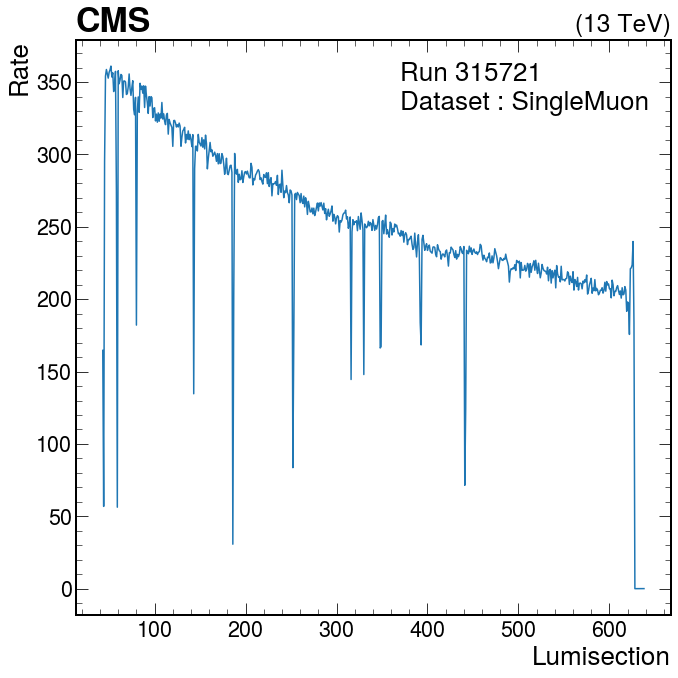

In [13]:
dataframe_json=pd.json_normalize(folded_json['data'])[33:628]
f, ax=plt.subplots()
hep.cms.label(loc=0)
ax.plot(dataframe_json['attributes.first_lumisection_number'],dataframe_json['attributes.rate'])
plt.legend(title="Run 315721\nDataset : SingleMuon")
#plt.vlines(33,0,400,color='red')
#plt.vlines(638,0,400,color='red')
plt.xlabel('Lumisection')
plt.ylabel('Rate')
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Autocorrelation')

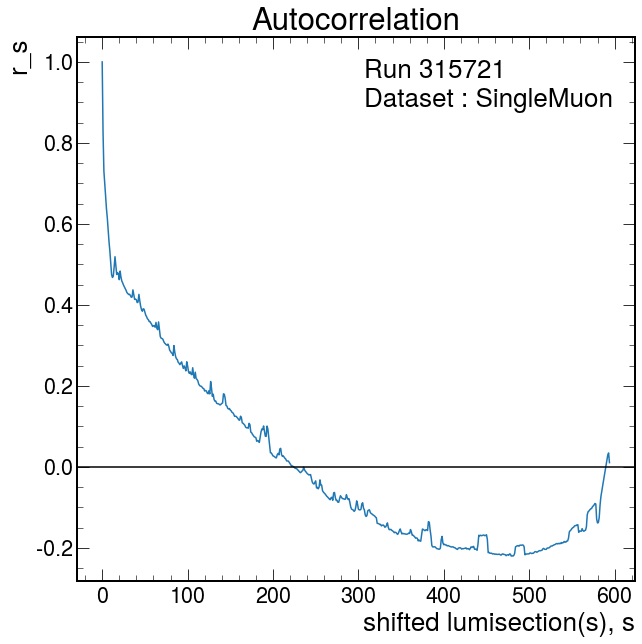

In [22]:
plt.plot(acf(dataframe_json['attributes.rate'],nlags=600-1,fft=False))
plt.xlabel("shifted lumisection(s), s")
plt.legend(title='Run 315721 \nDataset : SingleMuon')
plt.axhline(color='black')
plt.ylabel("r_s")
plt.title("Autocorrelation")

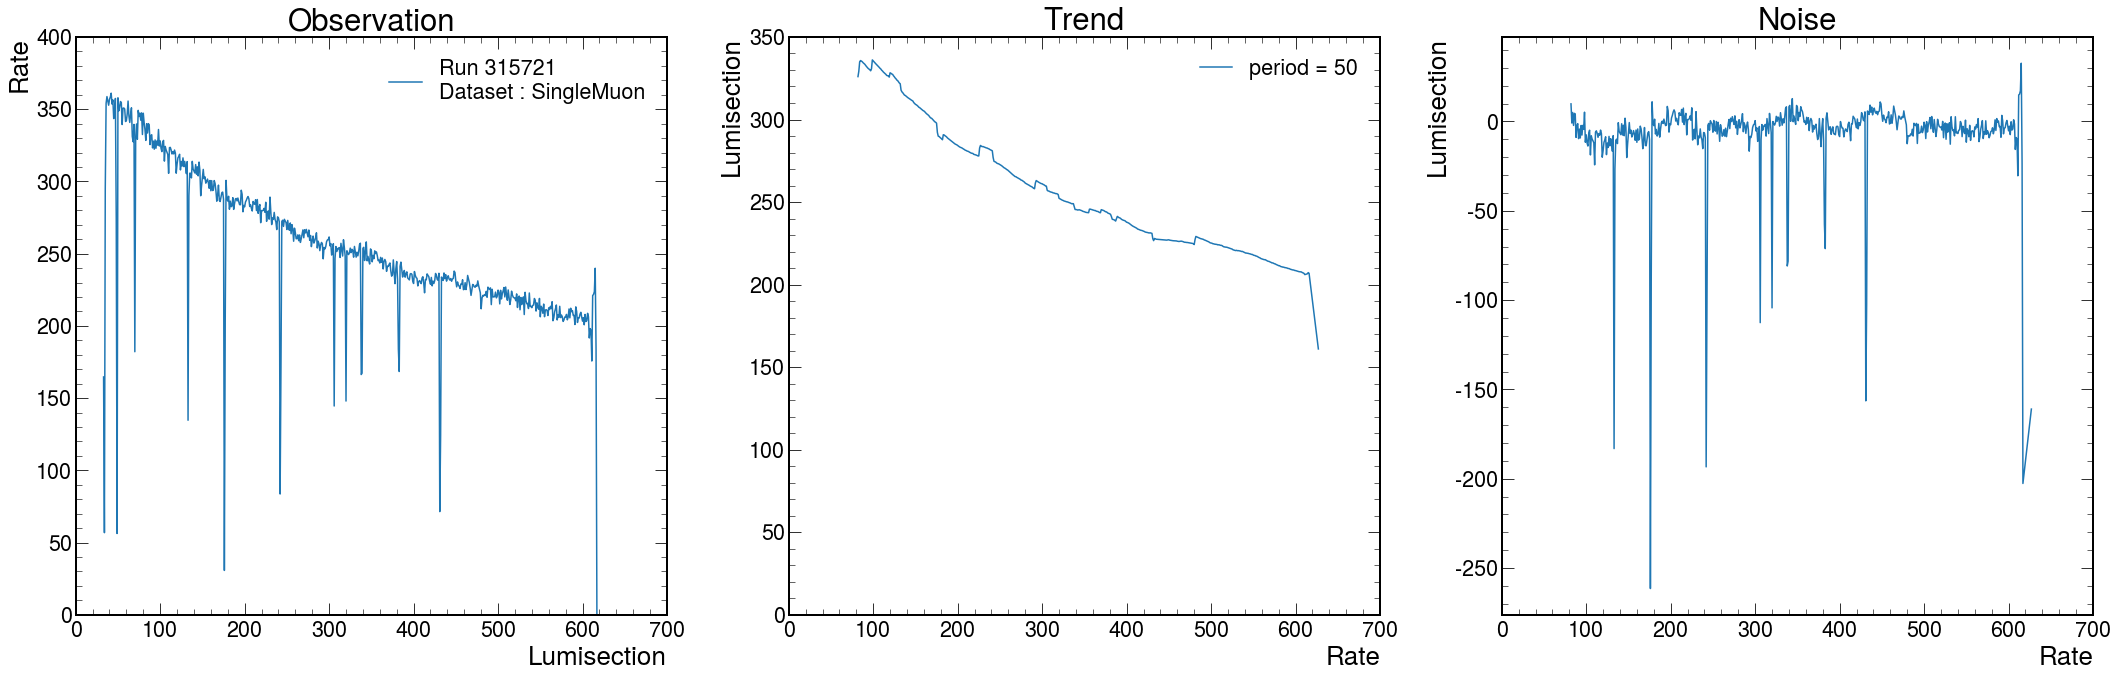

In [37]:
plt.subplots(1,3,figsize=(30,10))
plt.subplot(131)
plt.plot(dataframe_json['attributes.rate'],label='Run 315721\nDataset : SingleMuon')
plt.xlim(0,700)
plt.ylim(0,400)
plt.ylabel('Rate')
plt.xlabel('Lumisection')
plt.title('Observation')
plt.legend()
plt.subplot(132)
dataframe_json['average']=dataframe_json['attributes.rate'].rolling(window=50).mean()
plt.plot(dataframe_json['average'],label='period = 50')
plt.xlim(0,700)
plt.ylim(0,350)
plt.xlabel('Rate')
plt.ylabel('Lumisection')
plt.title('Trend')
plt.legend()
plt.subplot(133)
plt.plot((dataframe_json['attributes.rate']-dataframe_json['average']).dropna())
plt.xlim(0,700)
plt.xlabel('Rate')
plt.ylabel('Lumisection')
plt.title('Noise')
plt.tight_layout()